In [1]:
import pandas as pd
import subprocess
import sys
from IPython.display import display
# Установка кодировки UTF-8 для вывода
# sys.stdout.reconfigure(encoding='utf-8')
# Сброс ограничений на количество выводимых рядов
#pd.set_option('display.max_rows', None)
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
import time
import os
from IPython.display import clear_output
import matplotlib.pyplot as plt

# Анализ коммерческой недвижимости в городе

В данной работе проанализируем коммерческую недвижимость в городе с целью выбора оптимального варианта для аренды под нужды малого бизнеса.

## Описание данных

 Данные получены с сайта объявлений.
 
    'url'- ссылка на объявление
    'title' - заголовок объявления
    'Entrance' - вход
    'Separate entrance' - наличие отдельного входа
    'Total area'- общая площадь
    'Floor'- этаж
    'Ceiling height' - высота потолков
    'Finishing' - отделка
    'Heating' - тип отопления
    'Rental type' - тип аренды
    'Minimum rental period' - минимальный срок аренды
    'Layout' - планировка
    'Rent of a part' - аренда части
    'Utilities included' - включение платежей в стоимость аренды
    'Heating.1' - дубликат типа отопления
    'Rental holidays' - арендные каникулы
    'price' - цена аренды
    'description' - описание
    'lat' - широта
    'lon' - долгота
    'building_type' - тип здания
    'parking' - наличие парковки
    'parking_cnt' - количество парковочных мест
    'district' - район города
    'date' - дата публикации объявления
    'views' - количество просмотров объявления
    'seller_type' - тип продавца
    'seller_score' - оценка продавца
    'reg_date' - дата регистрации продавца
    'items_count' - количество объявлений продавца
    'comments_count' - количество комментариев
    'deposit' - залог

## Анализ данных в процессе сбора

Data shape: (742, 32)
Duplicated: 4


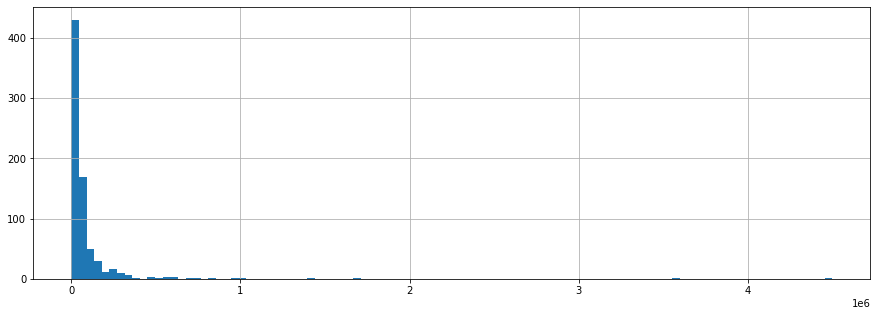

In [3]:
data = pd.read_csv(r'c:\Users\Андрей\Desktop\GitHub\local\avito\output.csv')
print('Data shape:', data.shape)
print('Duplicated:', data.duplicated().sum())
data['price'].hist(figsize=(15, 5), bins=100)
plt.show;

In [4]:
data.head(3)

,url,title,Entrance,Separate entrance,Total area,Floor,Ceiling height,Finishing,Heating,Rental type,Minimum rental period,Layout,Rent of a part,Utilities included,Heating.1,Rental holidays,price,description,lat,lon,building_type,parking,parking_cnt,district,date,views,seller_type,seller_score,reg_date,items_count,comments_count,deposit
0,https://www.avito.ru/ufa/kommercheskaya_nedviz...,"Свободного назначения, 101.7 м²",с улицы,есть,101.7 м²,1,4 м,чистовая,NaN,прямая,NaN,NaN,NaN,NaN,NaN,есть,99000,"ОписаниеСдам в аренду чистовое помещение, сам ...",54.717814,55.978170,жилой дом,"на улице, бесплатная",50,р-н Кировский,· вчера в 16:30,266 просмотров,Арендодатель,NaN,Завершено 6 объявлений,NaN,NaN,"973 ₽ в месяц за м², залог 99 000 ₽"
1,https://www.avito.ru/ufa/kommercheskaya_nedviz...,"Свободного назначения, 185.5 м²",с улицы,есть,185.5 м²,1,3 м,чистовая,NaN,прямая,12 мес.,NaN,NaN,эксплуатационные,NaN,есть,180000,ОписаниеСдаётся в аренду на длительный срок то...,54.724878,55.932050,жилой дом,"на улице, бесплатная",NaN,р-н Кировский,· вчера в 18:11,506 просмотров,Арендодатель,NaN,NaN,NaN,NaN,"970 ₽ в месяц за м², залог 180 000 ₽"
2,https://www.avito.ru/ufa/kommercheskaya_nedviz...,"Торговая площадь, 50 м²",с улицы,есть,50 м²,подвальный,2.7 м,чистовая,центральное,прямая,NaN,NaN,возможна,коммунальные,центральное,есть,700,ОписаниеСдаются торговые помещения в специализ...,54.736447,55.989755,жилой дом,"на улице, бесплатная, подходит для грузового ...",NaN,р-н Советский,· вчера в 12:40,4193 просмотра,Арендодатель,NaN,NaN,NaN,NaN,"700 ₽ в месяц за м², залог 35 000 ₽"


## Очистка данных

Столбец title содержит информацию о назначении и площади помещения. Их необходимо разделить.

In [ ]:
data['purpose'] = data['title'].apply(lambda x: x.split(',')[0])
data['area'] = data['title'].apply(lambda x: x.split(',')[1])
data.head(3)

In [ ]:
data.head()